# Loan - No Loan Predict

### Problem Statement 

A personal loan is an unsecured credit provided by financial institutions based on criteria like employment history, repayment capacity, income level, profession, and credit history. This is also known as a consumer loan or a multi-purpose loan, and it helps the borrower meet any of their immediate needs.

One of the leading bankers in US has approached you to predict on the defaulters with the help of the recent data on the personal loans availed by various customers. You are now asked to build a robust machine learning model that would distinguish the future applicants who might default and help the bank to take proactive measures.

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action = 'ignore')

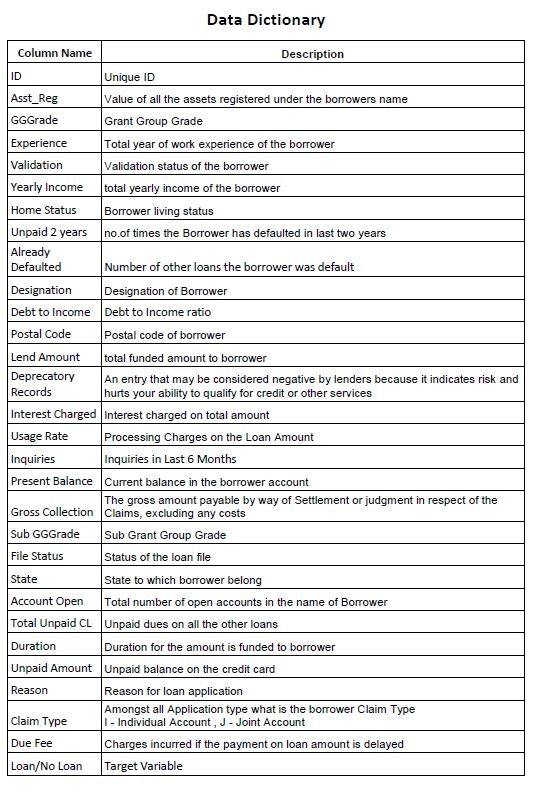

In [2]:
# Reading dataset

df_train = pd.read_csv('Data_Train.csv')

In [3]:
df_train.head()

ID  Asst_Reg GGGrade Experience       Validation  Yearly Income  \
0   95074    421802      II     >10yrs            Vfied      633600.00   
1  134131   3964312      IV       7yrs  Source Verified       85483.20   
2   92602   4247560     III       <1yr  Source Verified       79200.00   
3   22591    197179     III       <1yr            Vfied       61600.00   
4  125060   4646684       V       2yrs  Source Verified       68053.92   

  Home Status  Unpaid 2 years  Already Defaulted       Designation  ...  \
0    MOR??AGE               0                  0   GLENDALE NISSAN  ...   
1        REN?               0                  0  Business Teacher  ...   
2        REN?               0                  0            driver  ...   
3        REN?               0                  0          AvePoint  ...   
4        REN?               0                  0       Lead Tester  ...   

   File Status       State  Account Open  Total Unpaid CL  Duration  \
0   fully paid  California            17          58598.0   3 years   
1        whole          NC            15          18924.0   5 years   
2        whole     Florida             7          15604.0   5 years   
3   fully paid   NewJersey             9          22410.0   3 years   
4   fully paid          LA            10          36022.0   5 years   

   Unpaid Amount               Reason  Claim Type  Due Fee  Loan/No Loan  
0       31216.05  debt  consolidation           I      0.0             0  
1       11660.49  debt  consolidation           I      0.0             0  
2        5637.87      major  purchase           I      0.0             0  
3       15607.17      major  purchase           I      0.0             1  
4       27472.86  debt  consolidation           I      0.0             0  

[5 rows x 30 columns]

In [5]:
df_train.shape

# There are 87500 rows and 30 columns in the train set

(87500, 30)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly Income        81925 non-null  float64
 6   Home Status          87500 non-null  object 
 7   Unpaid 2 years       87500 non-null  int64  
 8   Already Defaulted    87500 non-null  int64  
 9   Designation          86086 non-null  object 
 10  Debt to Income       84011 non-null  float64
 11  Postal Code          86111 non-null  float64
 12  Lend Amount          87500 non-null  float64
 13  Deprecatory Records  87500 non-null  int64  
 14  Interest Charged     87500 non-null  float64
 15  Usage Rate           87500 non-null 

In [8]:
df_train.describe()

# 5-pt summary of numerical columns in the train set

ID      Asst_Reg  Yearly Income  Unpaid 2 years  \
count   87500.000000  8.750000e+04   8.192500e+04    87500.000000   
mean    83946.253509  3.798914e+06   1.348596e+05        0.332937   
std     36100.102950  2.289038e+06   9.882473e+04        0.876080   
min     21560.000000  2.484700e+04   8.800000e+03        0.000000   
25%     52616.750000  1.483874e+06   8.324659e+04        0.000000   
50%     83900.000000  4.132010e+06   1.144000e+05        0.000000   
75%    115261.250000  5.952909e+06   1.601600e+05        0.000000   
max    146559.000000  7.351847e+06   8.264031e+06       18.000000   

       Already Defaulted  Debt to Income   Postal Code   Lend Amount  \
count       87500.000000    84011.000000  86111.000000  87500.000000   
mean            0.005726       30.942660  51155.385491  25920.535680   
std             0.083505       14.079813  31211.229930  14433.837213   
min             0.000000        0.000000   1000.000000   1710.000000   
25%             0.000000       20.428800  22900.000000  15048.000000   
50%             0.000000       30.139200  47700.000000  23940.000000   
75%             0.000000       40.908000  80200.000000  34200.000000   
max             6.000000      639.290400  99900.000000  59850.000000   

       Deprecatory Records  Interest Charged    Usage Rate     Inquiries  \
count         87500.000000      87500.000000  87500.000000  87500.000000   
mean              0.202400         16.518375     95.517348      0.670640   
std               0.646414          4.902011     40.554035      0.959572   
min               0.000000          8.000000      0.000000      0.000000   
25%               0.000000         12.310000     66.048000      0.000000   
50%               0.000000         16.490000     97.008000      0.000000   
75%               0.000000         20.770000    126.592000      1.000000   
max              86.000000         25.000000   1534.756000      8.000000   

       Present Balance  Gross Collection   Sub GGGrade  Account Open  \
count     8.750000e+04      87500.000000  87500.000000   87500.00000   
mean      2.363895e+05         39.461697     22.024891      12.77944   
std       2.550568e+05        391.919578      6.452697       5.37116   
min       0.000000e+00          0.000000     11.000000       2.00000   
25%       5.173493e+04          0.000000     17.000000       9.00000   
50%       1.388062e+05          0.000000     21.000000      12.00000   
75%       3.534755e+05          0.000000     26.000000      16.00000   
max       5.629234e+06      26308.470000     45.000000      83.00000   

       Total Unpaid CL  Unpaid Amount       Due Fee  Loan/No Loan  
count     8.331400e+04   8.264800e+04  87500.000000  87500.000000  
mean      5.326864e+04   2.955649e+04      0.316407      0.188709  
std       5.325551e+04   3.745625e+04      3.546087      0.391279  
min       3.320000e+02   0.000000e+00      0.000000      0.000000  
25%       2.324000e+04   1.144674e+04      0.000000      0.000000  
50%       3.967400e+04   2.089278e+04      0.000000      0.000000  
75%       6.640000e+04   3.644908e+04      0.000000      0.000000  
max       1.710630e+06   1.338778e+06    169.050000      1.000000

In [9]:
df_train.dtypes

# column data types for train set

ID                       int64
Asst_Reg                 int64
GGGrade                 object
Experience              object
Validation              object
Yearly Income          float64
Home Status             object
Unpaid 2 years           int64
Already Defaulted        int64
Designation             object
Debt to Income         float64
Postal Code            float64
Lend Amount            float64
Deprecatory Records      int64
Interest Charged       float64
Usage Rate             float64
Inquiries                int64
Present Balance        float64
Gross Collection       float64
Sub GGGrade              int64
File Status             object
State                   object
Account Open             int64
Total Unpaid CL        float64
Duration                object
Unpaid Amount          float64
Reason                  object
Claim Type              object
Due Fee                float64
Loan/No Loan             int64
dtype: object

In [10]:
df_train.std()
# All the independent numerical columns are having sufficiently significant standard deviation.

ID                     3.610010e+04
Asst_Reg               2.289038e+06
Yearly Income          9.882473e+04
Unpaid 2 years         8.760799e-01
Already Defaulted      8.350455e-02
Debt to Income         1.407981e+01
Postal Code            3.121123e+04
Lend Amount            1.443384e+04
Deprecatory Records    6.464135e-01
Interest Charged       4.902011e+00
Usage Rate             4.055404e+01
Inquiries              9.595719e-01
Present Balance        2.550568e+05
Gross Collection       3.919196e+02
Sub GGGrade            6.452697e+00
Account Open           5.371160e+00
Total Unpaid CL        5.325551e+04
Unpaid Amount          3.745625e+04
Due Fee                3.546087e+00
Loan/No Loan           3.912792e-01
dtype: float64

### Data Cleaning

In [11]:
missing_df = pd.DataFrame()
null_values = df_train.isnull().sum()
null_percent = df_train.isnull().sum()/len(df_train)*100
missing_df['Features'] = df_train.columns.tolist()
missing_df['Null Count'] = null_values.values
missing_df['Null Percentage'] = null_percent.values
missing_df[missing_df['Null Count'] != 0]

# Following are the columns having null values.
# Columns - 'Designation', 'Postal Code' are having null value percentage < 2 %, we can consider dropping the rows.

Features  Null Count  Null Percentage
5     Yearly Income        5575         6.371429
9       Designation        1414         1.616000
10   Debt to Income        3489         3.987429
11      Postal Code        1389         1.587429
23  Total Unpaid CL        4186         4.784000
25    Unpaid Amount        4852         5.545143

In [12]:
df_train = df_train.dropna(subset = ['Designation', 'Postal Code'])

In [13]:
missing_list = missing_df[missing_df['Null Count'] != 0]['Features'].tolist()

In [14]:
missing_list.remove('Designation')
missing_list.remove('Postal Code')

In [15]:
for i in missing_list:
    print(i,':', df_train[i].skew())
    
# We can see the skewness for the various columns having null values below.
# Columns 'Yearly Income', 'Unpaid Amount', 'Total Unpaid CL' are highly positively skewed.
# Whereas columns 'Debt to Income' and 'Postal Code' are slightly positively skewed.
# For high skewness, we can replace the null values with the median of the column.
# For low skewness, we can replace the null values with the mean of the column.

Yearly Income : 11.625638432220102
Debt to Income : 1.2003583585149573
Total Unpaid CL : 5.869553874556941
Unpaid Amount : 8.746063784959624


In [16]:
df_train['Yearly Income'].fillna(df_train['Yearly Income'].median(), inplace = True)
df_train['Total Unpaid CL'].fillna(df_train['Total Unpaid CL'].median(), inplace = True)
df_train['Unpaid Amount'].fillna(df_train['Unpaid Amount'].median(), inplace = True)
df_train['Debt to Income'].fillna(df_train['Debt to Income'].mean(), inplace = True)

In [17]:
df_train.isnull().sum()

ID                     0
Asst_Reg               0
GGGrade                0
Experience             0
Validation             0
Yearly Income          0
Home Status            0
Unpaid 2 years         0
Already Defaulted      0
Designation            0
Debt to Income         0
Postal Code            0
Lend Amount            0
Deprecatory Records    0
Interest Charged       0
Usage Rate             0
Inquiries              0
Present Balance        0
Gross Collection       0
Sub GGGrade            0
File Status            0
State                  0
Account Open           0
Total Unpaid CL        0
Duration               0
Unpaid Amount          0
Reason                 0
Claim Type             0
Due Fee                0
Loan/No Loan           0
dtype: int64

In [18]:
# We have handled all the null values. Now there are no null values present in the dataset.

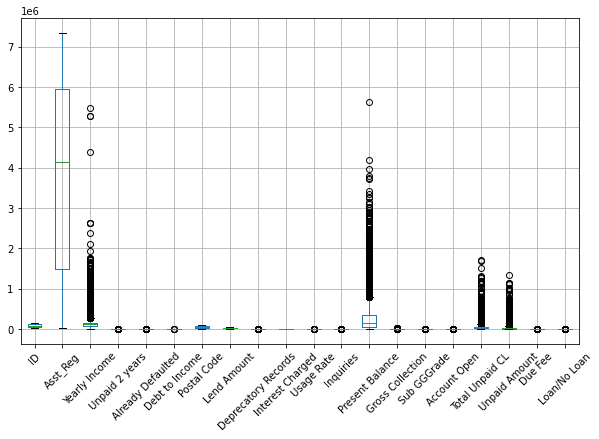

In [19]:
plt.figure(figsize = (10,6))
df_train.boxplot()
plt.xticks(rotation = 45)
plt.show()

# From the boxplot below, we can observe there are outliers present in majority of the columns.
# We can treat them using IQR technique. We can decide to remove them based on the base model performance.
# As of now, we will not remove them as they might contain valuable information.

### EDA + Insights

In [20]:
df_train.head()

ID  Asst_Reg GGGrade Experience       Validation  Yearly Income  \
0   95074    421802      II     >10yrs            Vfied      633600.00   
1  134131   3964312      IV       7yrs  Source Verified       85483.20   
2   92602   4247560     III       <1yr  Source Verified       79200.00   
3   22591    197179     III       <1yr            Vfied       61600.00   
4  125060   4646684       V       2yrs  Source Verified       68053.92   

  Home Status  Unpaid 2 years  Already Defaulted       Designation  ...  \
0    MOR??AGE               0                  0   GLENDALE NISSAN  ...   
1        REN?               0                  0  Business Teacher  ...   
2        REN?               0                  0            driver  ...   
3        REN?               0                  0          AvePoint  ...   
4        REN?               0                  0       Lead Tester  ...   

   File Status       State  Account Open  Total Unpaid CL  Duration  \
0   fully paid  California            17          58598.0   3 years   
1        whole          NC            15          18924.0   5 years   
2        whole     Florida             7          15604.0   5 years   
3   fully paid   NewJersey             9          22410.0   3 years   
4   fully paid          LA            10          36022.0   5 years   

   Unpaid Amount               Reason  Claim Type  Due Fee  Loan/No Loan  
0       31216.05  debt  consolidation           I      0.0             0  
1       11660.49  debt  consolidation           I      0.0             0  
2        5637.87      major  purchase           I      0.0             0  
3       15607.17      major  purchase           I      0.0             1  
4       27472.86  debt  consolidation           I      0.0             0  

[5 rows x 30 columns]

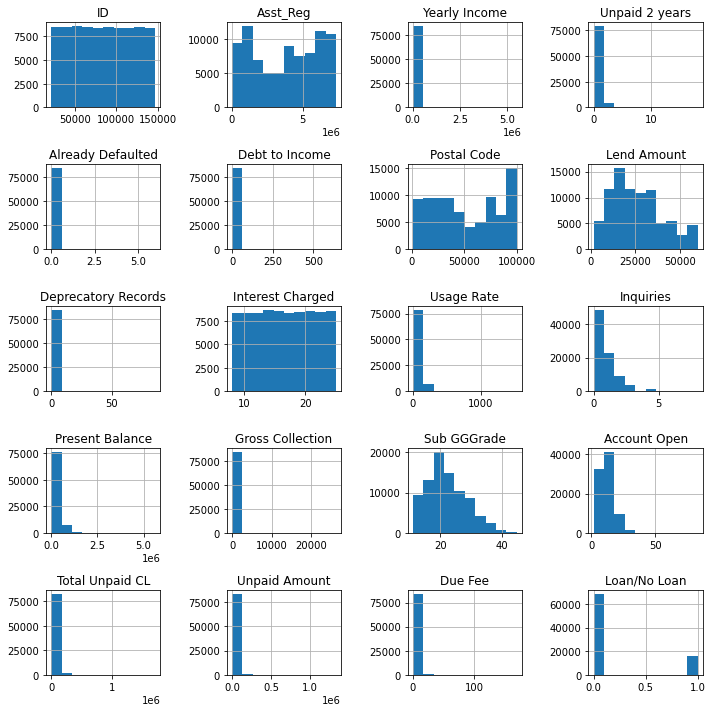

In [21]:
df_train.hist(figsize = (10, 10))
plt.tight_layout()
plt.show()

In [22]:
# Majority of the columns are skewed and do not follow normal distribution.

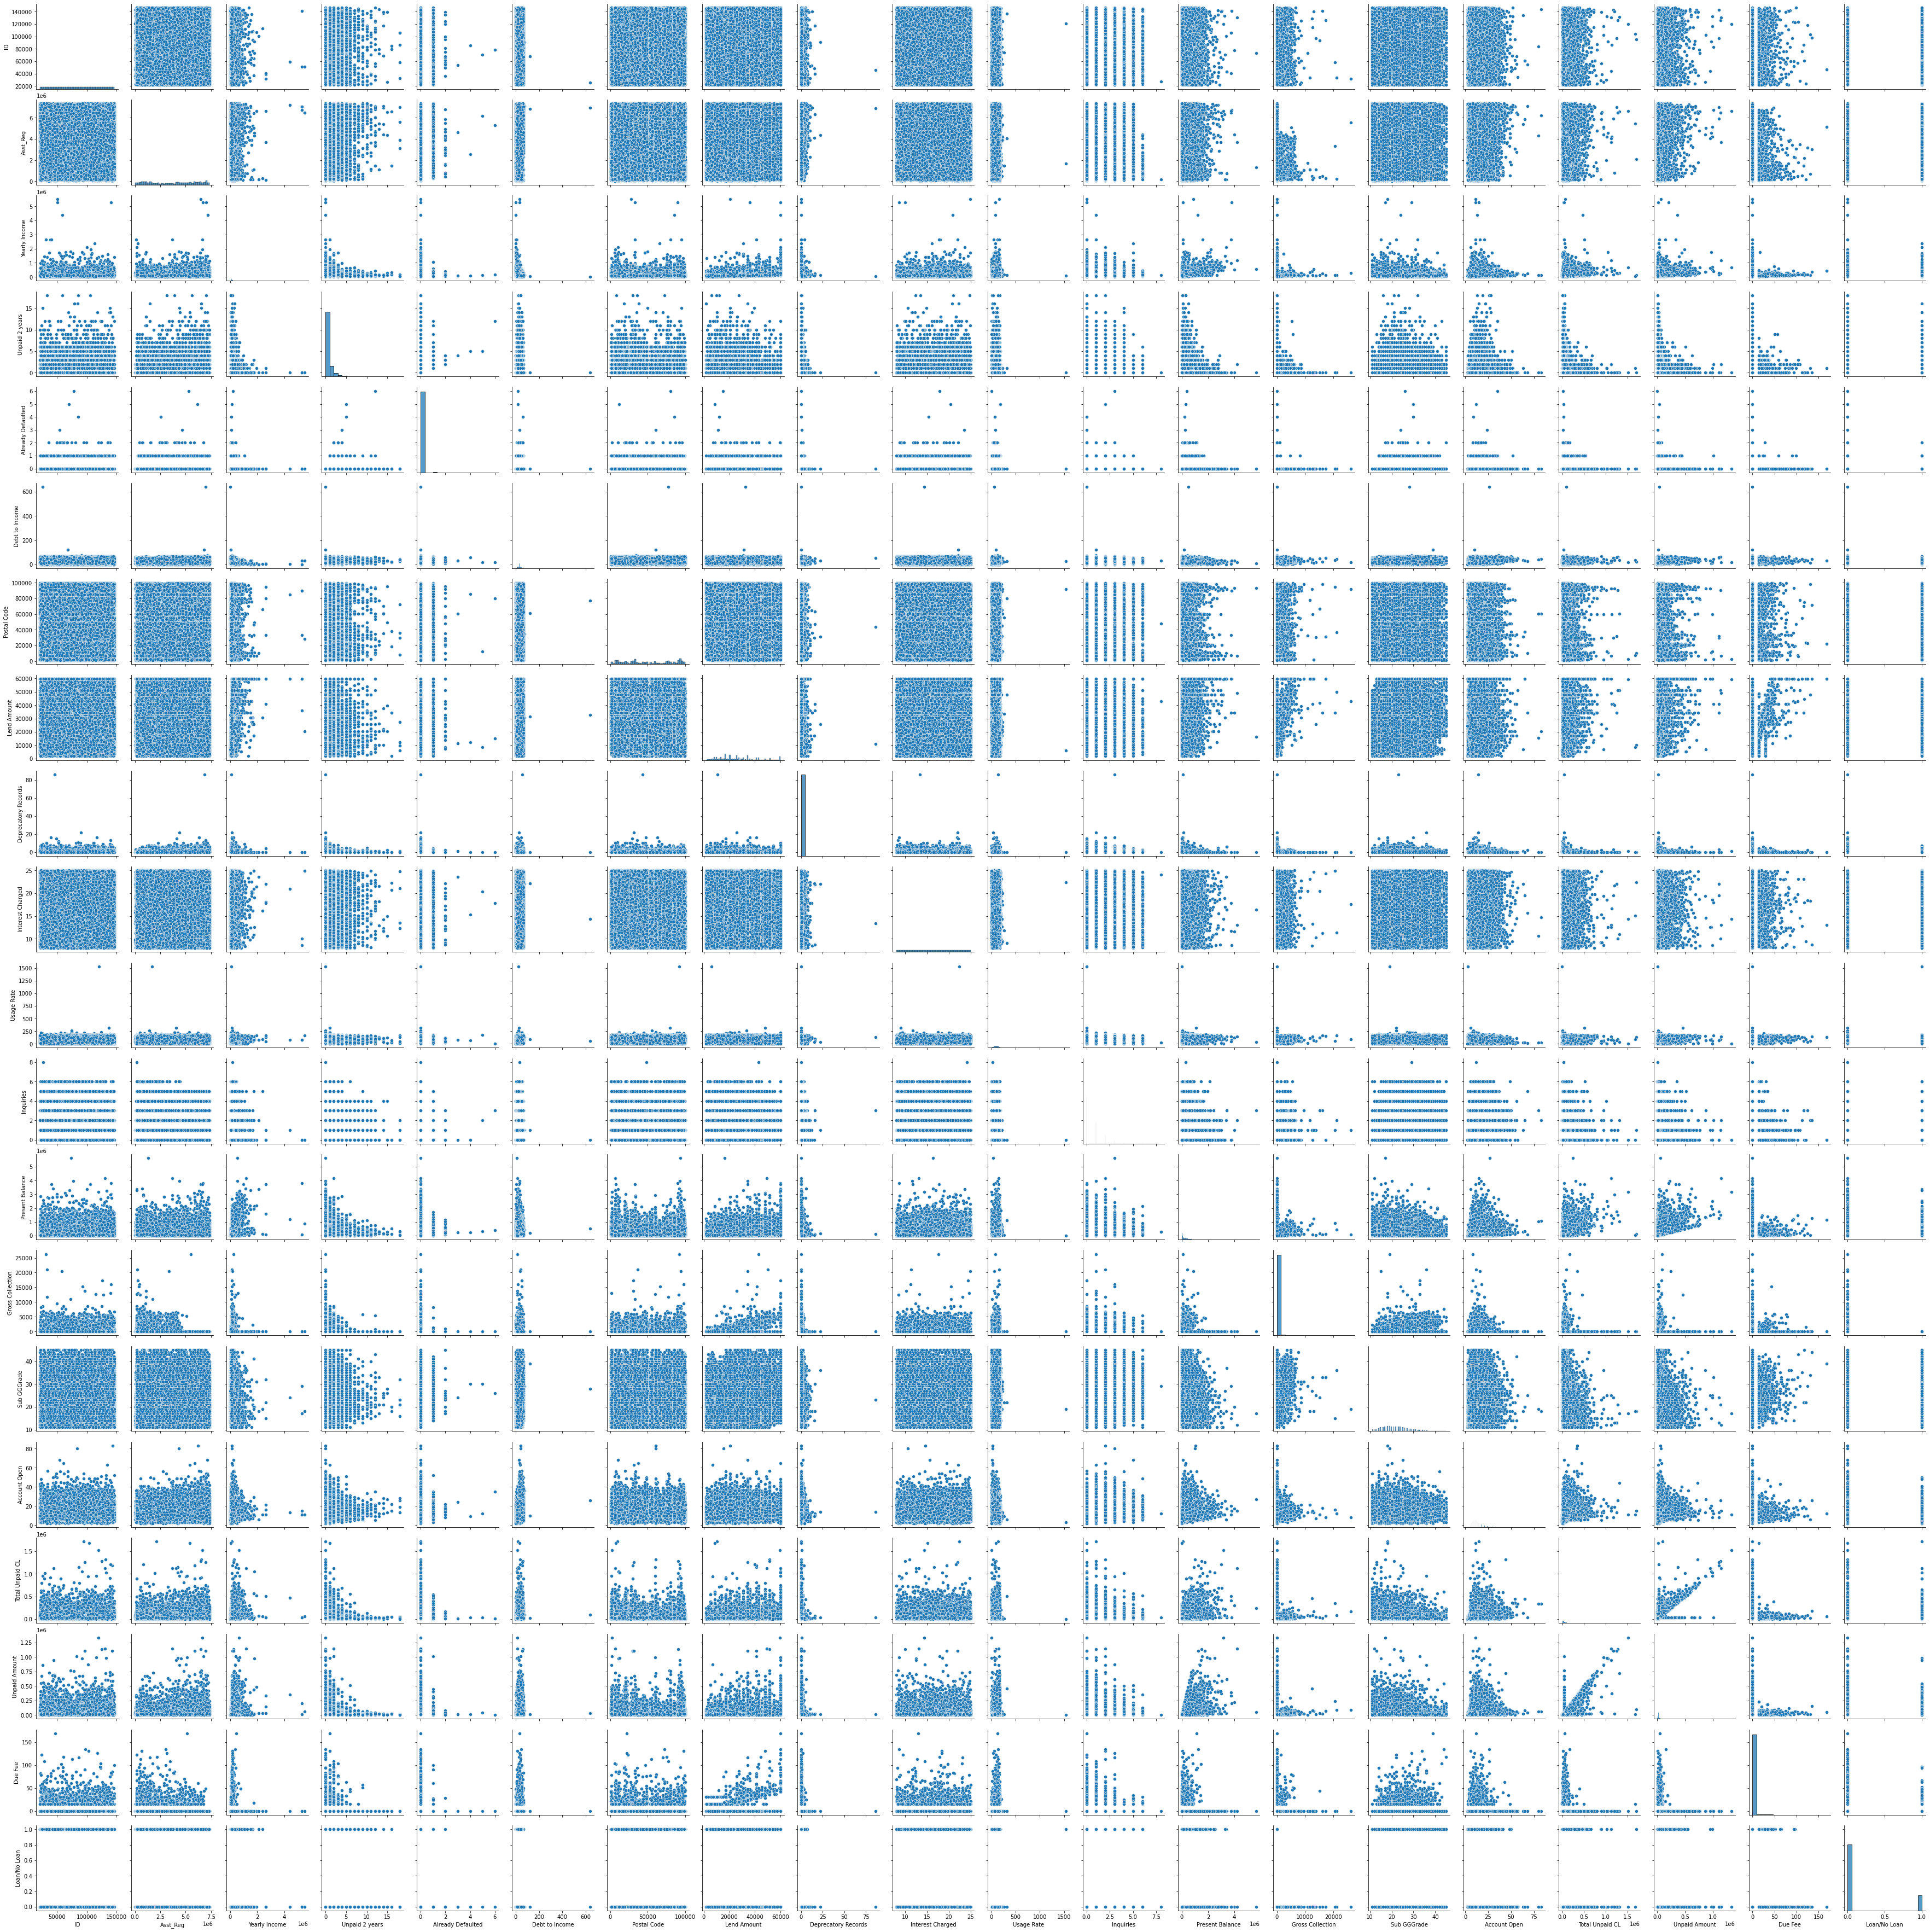

In [23]:
sns.pairplot(df_train)
plt.show()

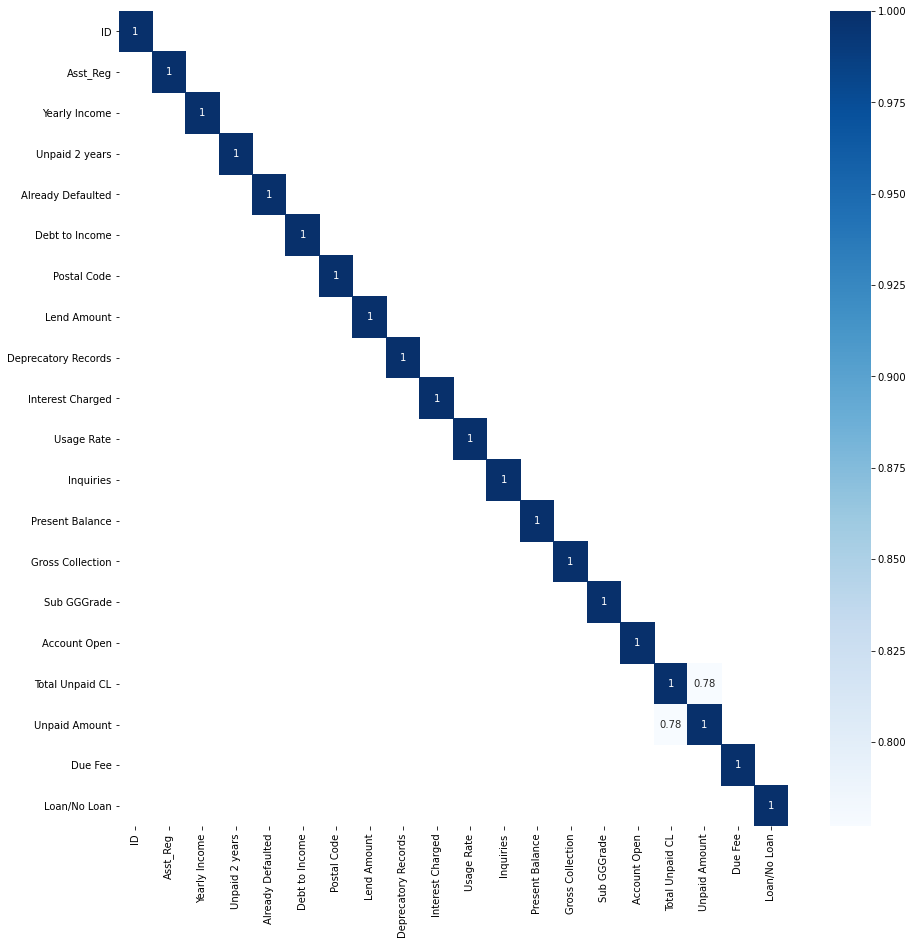

In [24]:
plt.figure(figsize = (15, 15))
sns.heatmap(df_train.corr()[abs(df_train.corr()) > 0.5], annot = True, cmap = 'Blues')
plt.show()

# Folowing Correlation Heatmap shows only thos correlation coefficients which are greater than 0.5.
# We have only one pair of variables having correlation greater than 0.5.
# Columns - 'Total Unpaid CL' and 'Unpaid Amount' have correlation coefficient as 0.78.

In [25]:
df_train_cat = df_train.select_dtypes(include = object)

In [26]:
df_train_cat.columns

Index(['GGGrade', 'Experience', 'Validation', 'Home Status', 'Designation',
       'File Status', 'State', 'Duration', 'Reason', 'Claim Type'],
      dtype='object')

In [27]:
cat_column = df_train_cat.columns.tolist()
cat_column.remove('State')
cat_column.remove('Designation')

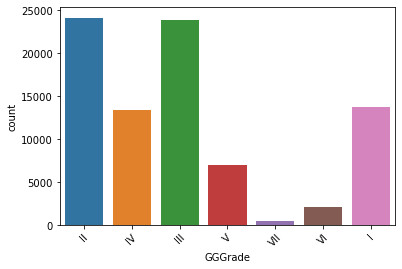

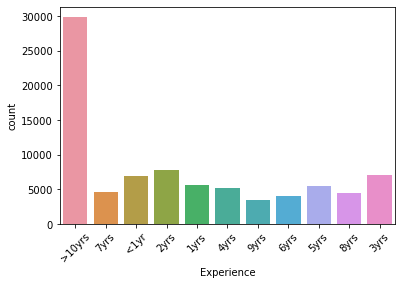

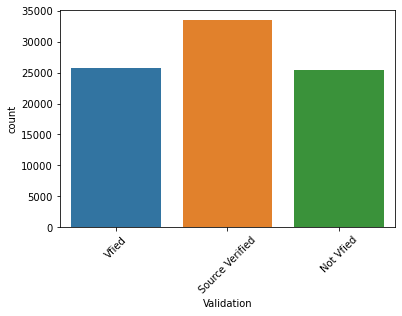

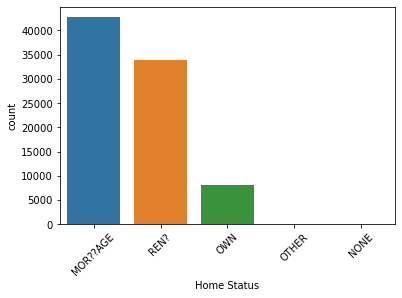

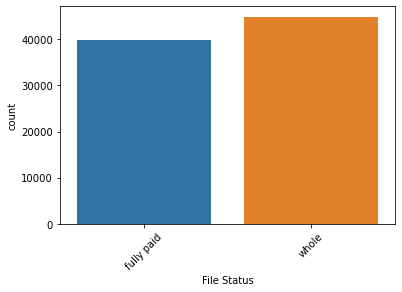

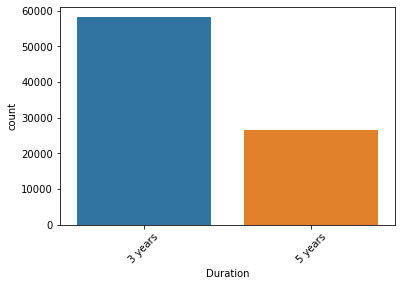

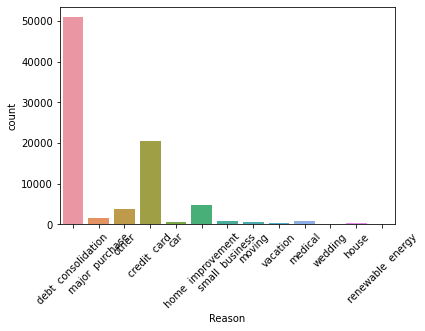

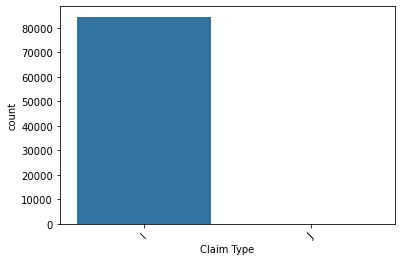

In [28]:
for i in cat_column:
    sns.countplot(df_train[i])
    plt.xticks(rotation = 45)
    plt.show()

In [29]:
# The bargraphs above show the count of different categories in the different columns.

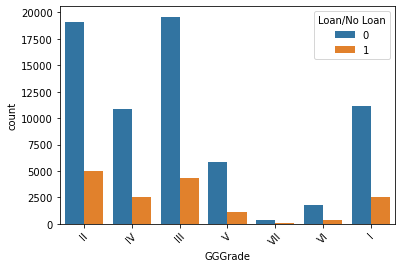

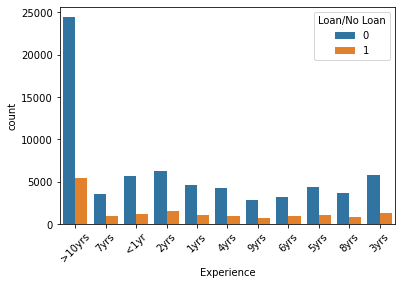

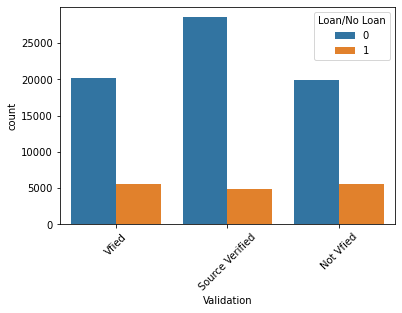

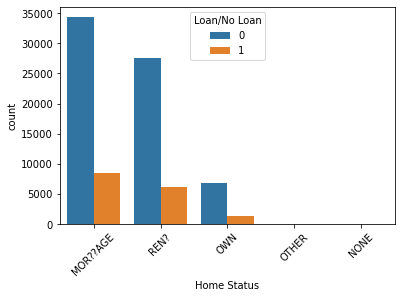

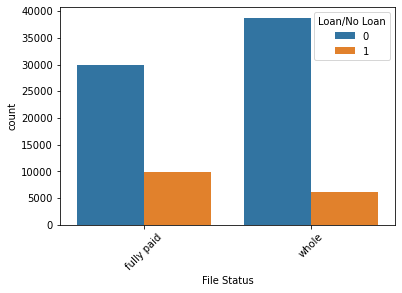

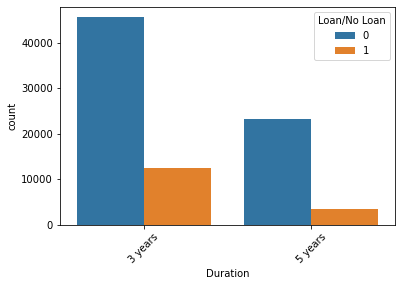

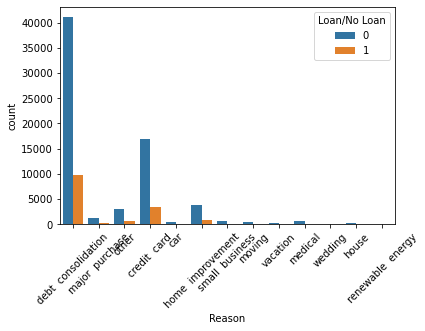

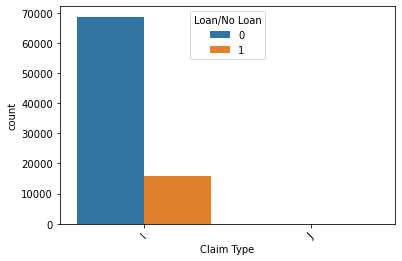

In [30]:
for i in cat_column:
    sns.countplot(df_train[i], hue = df_train['Loan/No Loan'])
    plt.xticks(rotation = 45)
    plt.show()

In [31]:
# The bargraphs above show the count of different categories in the different columns 
# with respect to the two classes in the target column.

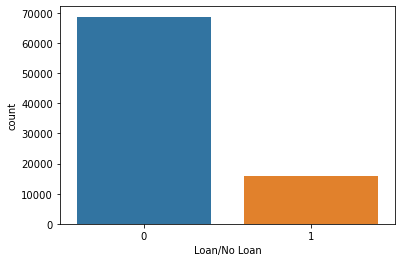

0    81.13114
1    18.86886
Name: Loan/No Loan, dtype: float64


In [32]:
# Distribution of target column

sns.countplot(df_train['Loan/No Loan'])
plt.show()

print(df_train['Loan/No Loan'].value_counts(normalize = True)*100)


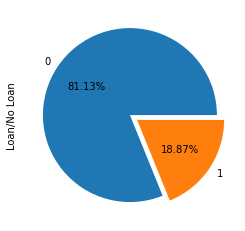

In [33]:
df_train['Loan/No Loan'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', explode = [0, 0.1])
plt.show()

# There is slight imbalance in our dataset.
# The majority class 0 or No Loan is 81 % whereas the minority class 1 or Loan is 19 %. 
# Once we fit the base model, based on its performance, we can consider applying balancing techniques to 
# get better results.

In [34]:
# Degree of Imbalance Proportion of Minority Class :
# a. 20 - 40 % - Mild Imbalance
# b. 1 - 20 % - Moderate Imbalance
# c. < 1 % - Extreme Imbalance

# Based on the above metric, our dataset falls in the category of Moderate Imbalance.
# We can experiment with balancing techniques like SMOTE, Random Over-Under Sampling methods to balance our dataset.

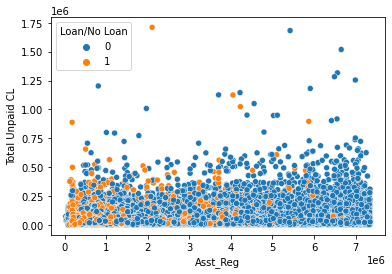

In [35]:
sns.scatterplot(df_train['Asst_Reg'], df_train['Total Unpaid CL'], hue = df_train['Loan/No Loan'])
plt.show()

In [36]:
# Here, from the above scatterplot we can see that there are more observations belonging to the minority class for
# lower values of 'Asst_Reg' and 'Total Unpaid CL'

In [37]:
## getting percentage of observations in each column

obj_df = df_train.select_dtypes(object)
obj_df = obj_df.drop(['State', 'Designation'], axis = 1)
percent_df = pd.DataFrame(columns=['Unique_Values','Count_of_observation','Percentage_of_observation'],
                          index=range(obj_df.shape[1]))


for i in range(obj_df.shape[1]):
   
    a = (list(obj_df.iloc[:,i].value_counts().index),list(obj_df.iloc[:,i].value_counts().values),list(round(obj_df.iloc[:,i].value_counts(normalize=True)*100,2).values))
    
    percent_df['Unique_Values'][i] = a[0]
    percent_df['Count_of_observation'][i] = a[1]
    percent_df['Percentage_of_observation'][i] = a[2]
    
percent_df

Unique_Values  \
0                       [II, III, I, IV, V, VI, VII]   
1  [>10yrs, 2yrs, 3yrs, <1yr, 1yrs, 5yrs, 4yrs, 7...   
2                [Source Verified, Vfied, Not Vfied]   
3                 [MOR??AGE, REN?, OWN, OTHER, NONE]   
4                                [whole, fully paid]   
5                                 [3 years, 5 years]   
6  [debt  consolidation, credit  card, home  impr...   
7                                             [I, J]   

                                Count_of_observation  \
0      [24153, 23883, 13720, 13416, 6921, 2131, 487]   
1  [29882, 7821, 7093, 6967, 5661, 5437, 5163, 46...   
2                              [33447, 25808, 25456]   
3                         [42763, 33804, 8136, 6, 2]   
4                                     [44829, 39882]   
5                                     [58117, 26594]   
6  [50908, 20422, 4728, 3652, 1462, 798, 728, 682...   
7                                        [84666, 45]   

                           Percentage_of_observation  
0      [28.51, 28.19, 16.2, 15.84, 8.17, 2.52, 0.57]  
1  [35.28, 9.23, 8.37, 8.22, 6.68, 6.42, 6.09, 5....  
2                              [39.48, 30.47, 30.05]  
3                     [50.48, 39.91, 9.6, 0.01, 0.0]  
4                                     [52.92, 47.08]  
5                                     [68.61, 31.39]  
6  [60.1, 24.11, 5.58, 4.31, 1.73, 0.94, 0.86, 0....  
7                                      [99.95, 0.05]

In [38]:
# Understanding the categorical variables

for i in df_train_cat:
    print(df_train_cat[i].value_counts(normalize = True))

II     0.285122
III    0.281935
I      0.161962
IV     0.158374
V      0.081701
VI     0.025156
VII    0.005749
Name: GGGrade, dtype: float64
>10yrs    0.352752
2yrs      0.092326
3yrs      0.083732
<1yr      0.082244
1yrs      0.066827
5yrs      0.064183
4yrs      0.060948
7yrs      0.054314
8yrs      0.052709
6yrs      0.048565
9yrs      0.041400
Name: Experience, dtype: float64
Source Verified    0.394837
Vfied              0.304659
Not Vfied          0.300504
Name: Validation, dtype: float64
MOR??AGE    0.504810
REN?        0.399051
OWN         0.096044
OTHER       0.000071
NONE        0.000024
Name: Home Status, dtype: float64
School Teacher               0.018404
Super Lead                   0.015464
Nurse                        0.008559
RN                           0.007520
Owner                        0.007236
                               ...   
retoucher                    0.000012
PERSONEL DEPT                0.000012
Senior Market Analyst        0.000012
Revenue Examiner  

In [39]:
# We need to clean the column - 'Home Status'

df_train['Home Status'].replace('MOR??AGE', 'MORTGAGE', inplace = True)
df_train['Home Status'].replace('REN?', 'RENT', inplace = True)

In [40]:
df_train.columns

Index(['ID', 'Asst_Reg', 'GGGrade', 'Experience', 'Validation',
       'Yearly Income', 'Home Status', 'Unpaid 2 years', 'Already Defaulted',
       'Designation', 'Debt to Income', 'Postal Code', 'Lend Amount',
       'Deprecatory Records', 'Interest Charged', 'Usage Rate', 'Inquiries',
       'Present Balance', 'Gross Collection', 'Sub GGGrade', 'File Status',
       'State', 'Account Open', 'Total Unpaid CL', 'Duration', 'Unpaid Amount',
       'Reason', 'Claim Type', 'Due Fee', 'Loan/No Loan'],
      dtype='object')

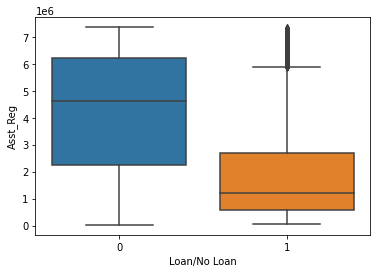

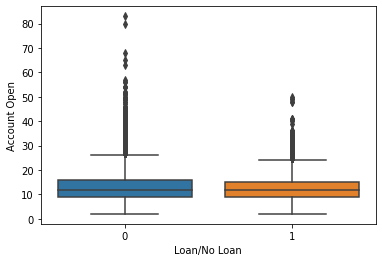

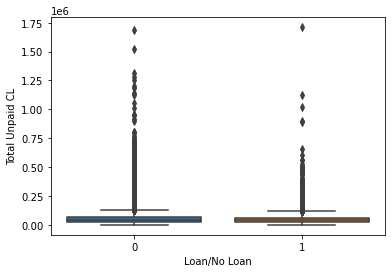

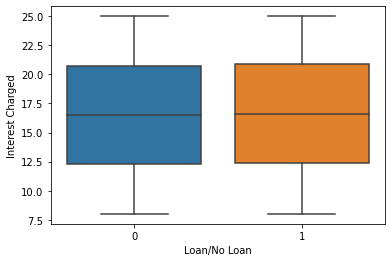

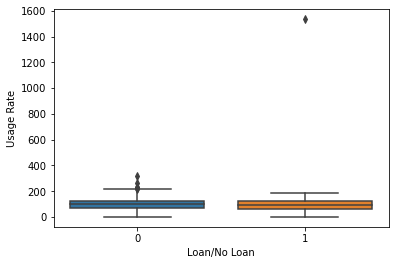

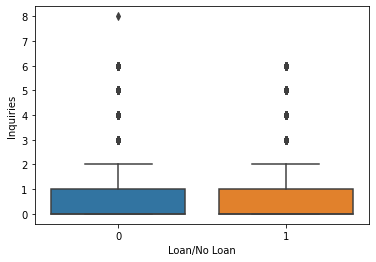

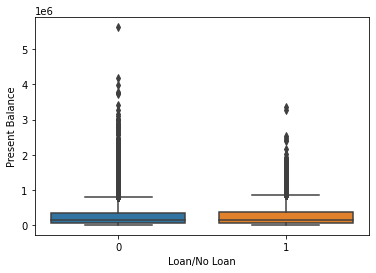

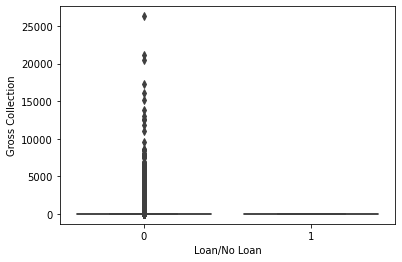

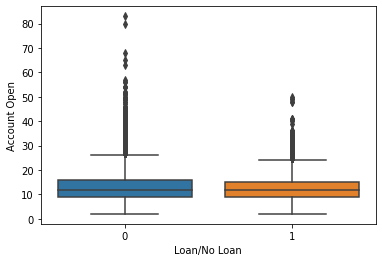

In [41]:
sns.boxplot(df_train['Loan/No Loan'], df_train['Asst_Reg'])
plt.show()

sns.boxplot(df_train['Loan/No Loan'], df_train['Account Open'])
plt.show()

sns.boxplot(df_train['Loan/No Loan'], df_train['Total Unpaid CL'])
plt.show()

sns.boxplot(df_train['Loan/No Loan'], df_train['Interest Charged'])
plt.show()

sns.boxplot(df_train['Loan/No Loan'], df_train['Usage Rate'])
plt.show()

sns.boxplot(df_train['Loan/No Loan'], df_train['Inquiries'])
plt.show()

sns.boxplot(df_train['Loan/No Loan'], df_train['Present Balance'])
plt.show()

sns.boxplot(df_train['Loan/No Loan'], df_train['Gross Collection'])
plt.show()

sns.boxplot(df_train['Loan/No Loan'], df_train['Account Open'])
plt.show()

In [42]:
# From the above boxplots, we can observe that there is significant difference between the classes for column 'Asst_Reg'.
# For the other columns, the distribution seems more or less the same.

### Statistical Analysis

In [44]:
import scipy.stats as st

# H0: Experience and Loan/No Loan are independent
# H1: Experience  and Loan/No Loan are dependent

table = pd.crosstab(df_train['Experience'], df_train['Loan/No Loan'])
obs_values = table.values

test_stat, p_value, df, expvalues = st.chi2_contingency(obs_values)
print(p_value)
# As the pvalue is < 0.05 (alpha), we reject H0.
# Therefore, the attributes, Experience and Loan/No Loan are dependent.

6.028358164071903e-16


In [45]:
# H0: GGGrade and Loan/No Loan are independent
# H1: GGGrade and Loan/No Loan are dependent

table = pd.crosstab(df_train['GGGrade'], df_train['Loan/No Loan'])
obs_values = table.values

test_stat, p_value, df, expvalues = st.chi2_contingency(obs_values)
print(p_value)
# As the pvalue is < 0.05 (alpha), we reject H0.
# Therefore, the attributes, GGGrade and Loan/No Loan are dependent.

4.618020463785716e-24


In [46]:
# H0: Validation and Loan/No Loan are independent
# H1: Validation  and Loan/No Loan are dependent

table = pd.crosstab(df_train['Validation'], df_train['Loan/No Loan'])
obs_values = table.values

test_stat, p_value, df, expvalues = st.chi2_contingency(obs_values)
print(p_value)
# As the pvalue is 0.95 < 0.05 (alpha), we reject H0.
# Therefore, the attributes, Validation and Loan/No Loan are dependent.

7.488999034291559e-145


In [47]:
# H0: Home Status are Loan/No Loan are independent
# H1: Home Status  are Loan/No Loan are dependent

table = pd.crosstab(df_train['Home Status'], df_train['Loan/No Loan'])
obs_values = table.values

test_stat, p_value, df, expvalues = st.chi2_contingency(obs_values)
print(p_value)
# As the pvalue is < 0.05 (alpha), we reject H0.
# Therefore, the attributes, Home Status and Loan/No Loan are dependent.

1.5629996937831623e-13


In [48]:
# H0: File Status are Loan/No Loan are independent
# H1: File Status  are Loan/No Loan are dependent

table = pd.crosstab(df_train['File Status'], df_train['Loan/No Loan'])
obs_values = table.values

test_stat, p_value, df, expvalues = st.chi2_contingency(obs_values)
print(p_value)
# As the pvalue is < 0.05 (alpha), we reject H0.
# Therefore, the attributes, File Status and Loan/No Loan are dependent.

0.0


In [49]:
# H0: Duration and Loan/No Loan are independent
# H1: Duration  and Loan/No Loan are dependent

table = pd.crosstab(df_train['Duration'], df_train['Loan/No Loan'])
obs_values = table.values

test_stat, p_value, df, expvalues = st.chi2_contingency(obs_values)
print(p_value)
# As the pvalue is < 0.05 (alpha), we reject H0.
# Therefore, the attributes, Duration and Loan/No Loan are dependent.

1.536512303230124e-194


In [50]:
# H0: State and Loan/No Loan are independent
# H1: State and Loan/No Loan are dependent

table = pd.crosstab(df_train['State'], df_train['Loan/No Loan'])
obs_values = table.values

test_stat, p_value, df, expvalues = st.chi2_contingency(obs_values)
print(p_value)
# As the pvalue is < 0.05 (alpha), we reject H0.
# Therefore, the attributes, State and Loan/No Loan are dependent.

1.1479923508127967e-34


In [51]:
# H0: Designation and Loan/No Loan are independent
# H1: Designation and Loan/No Loan are dependent

table = pd.crosstab(df_train['Designation'], df_train['Loan/No Loan'])
obs_values = table.values

test_stat, p_value, df, expvalues = st.chi2_contingency(obs_values)
print(p_value)
# As the pvalue is < 0.05 (alpha), we reject H0.
# Therefore, the attributes, Designation and Loan/No Loan are dependent.

5.279608605852661e-242


In [52]:
# H0: Reason and Loan/No Loan are independent
# H1: Reason and Loan/No Loan are dependent

table = pd.crosstab(df_train['Reason'], df_train['Loan/No Loan'])
obs_values = table.values

test_stat, p_value, df, expvalues = st.chi2_contingency(obs_values)
print(p_value)
# As the pvalue is < 0.05 (alpha), we reject H0.
# Therefore, the attributes, Reason and Loan/No Loan are dependent.

3.7440777188240104e-37


In [53]:
# H0: Claim Type are Loan/No Loan are independent
# H1: Claim Type  are Loan/No Loan are dependent

table = pd.crosstab(df_train['Claim Type'], df_train['Loan/No Loan'])
obs_values = table.values

test_stat, p_value, df, expvalues = st.chi2_contingency(obs_values)
print(p_value)
# As the pvalue is 0.95 < 0.05 (alpha), we reject H0.
# Therefore, the attributes, Claim Type and Loan/No Loan are dependent.

0.002323786951771825


In [54]:
import statsmodels.stats.weightstats as stests

# H0: mean_Asst_Reg(0) = mean_Asst_Reg(1)
# H1: mean_Asst_Reg(0) != mean_Asst_Reg(1)

A = df_train[df_train['Loan/No Loan'] == 1]['Asst_Reg']
B = df_train[df_train['Loan/No Loan'] == 0]['Asst_Reg']

test_stat, p_value = stests.ztest(A,B, alternative = 'two-sided')
print(p_value)

# Here, p-value < alpha(0.05), therefore, we reject H0.
# The mean value of Asst_Reg for the two classes is significantly different.

0.0


In [55]:
# H0: mean_Yearly_Income(0) = mean_Yearly_Income(1)
# H1: mean_Yearly_Income(0) != mean_Yearly_Income(1)

A = df_train[df_train['Loan/No Loan'] == 1]['Yearly Income']
B = df_train[df_train['Loan/No Loan'] == 0]['Yearly Income']

test_stat, p_value = stests.ztest(A,B, alternative = 'two-sided')
print(p_value)

# Here, p-value > alpha(0.05), therefore, we fail to reject H0.
# The mean value of Yearly_Income for the two classes is not dignificantly different.

0.38993272882154506


In [56]:
# H0: mean_Unpaid 2 years(0) = mean_Unpaid 2 years(1)
# H1: mean_Unpaid 2 years(0) != mean_Unpaid 2 years(1)

A = df_train[df_train['Loan/No Loan'] == 1]['Unpaid 2 years']
B = df_train[df_train['Loan/No Loan'] == 0]['Unpaid 2 years']

test_stat, p_value = stests.ztest(A,B, alternative = 'two-sided')
print(p_value)

# Here, p-value < alpha(0.05), therefore, we reject H0.
# The mean value of Unpaid 2 years for the two classes is significantly different.

1.125691120295168e-17


In [57]:
# H0: mean_Already Defaulted(0) = mean_Already Defaulted(1)
# H1: mean_Already Defaulted(0) != mean_Already Defaulted(1)

A = df_train[df_train['Loan/No Loan'] == 1]['Already Defaulted']
B = df_train[df_train['Loan/No Loan'] == 0]['Already Defaulted']

test_stat, p_value = stests.ztest(A,B, alternative = 'two-sided')
print(p_value)

# Here, p-value < alpha(0.05), therefore, we reject H0.
# The mean value of Already Defaulted for the two classes is significantly different.

0.008960152634470695


In [58]:
# H0: mean_Debt to Income(0) = mean_Debt to Income(1)
# H1: mean_Debt to Income(0) != mean_Debt to Income(1)

A = df_train[df_train['Loan/No Loan'] == 1]['Debt to Income']
B = df_train[df_train['Loan/No Loan'] == 0]['Debt to Income']

test_stat, p_value = stests.ztest(A,B, alternative = 'two-sided')
print(p_value)

# Here, p-value < alpha(0.05), therefore, we reject H0.
# The mean value of Debt to Income for the two classes is significantly different.

5.6408118085534034e-149


In [59]:
# H0: mean_Postal Code(0) = mean_Postal Code(1)
# H1: mean_Postal Code(0) != mean_Postal Code(1)

A = df_train[df_train['Loan/No Loan'] == 1]['Postal Code']
B = df_train[df_train['Loan/No Loan'] == 0]['Postal Code']

test_stat, p_value = stests.ztest(A,B, alternative = 'two-sided')
print(p_value)

# Here, p-value < alpha(0.05), therefore, we reject H0.
# The mean value of Debt to Income for the two classes is significantly different.

3.0090837290309827e-21


In [60]:
# H0: mean_Lend Amount(0) = mean_Lend Amount(1)
# H1: mean_Lend Amount(0) != mean_Lend Amount(1)

A = df_train[df_train['Loan/No Loan'] == 1]['Lend Amount']
B = df_train[df_train['Loan/No Loan'] == 0]['Lend Amount']

test_stat, p_value = stests.ztest(A,B, alternative = 'two-sided')
print(p_value)

# Here, p-value < alpha(0.05), therefore, we reject H0.
# The mean value of Lend Amount for the two classes is significantly different.

1.4087095161284963e-68


In [61]:
# H0: mean_Deprecatory Records(0) = mean_Deprecatory Records(1)
# H1: mean_Deprecatory Records(0) != mean_Deprecatory Records(1)

A = df_train[df_train['Loan/No Loan'] == 1]['Deprecatory Records']
B = df_train[df_train['Loan/No Loan'] == 0]['Deprecatory Records']

test_stat, p_value = stests.ztest(A,B, alternative = 'two-sided')
print(p_value)

# Here, p-value < alpha(0.05), therefore, we reject H0.
# The mean value of Deprecatory Records for the two classes is significantly different.

1.1418285274083017e-09


In [62]:
# H0: mean_Interest Charged(0) = mean_Interest Charged(1)
# H1: mean_Interest Charged(0) != mean_Interest Charged(1)

A = df_train[df_train['Loan/No Loan'] == 1]['Interest Charged']
B = df_train[df_train['Loan/No Loan'] == 0]['Interest Charged']

test_stat, p_value = stests.ztest(A,B, alternative = 'two-sided')
print(p_value)

# Here, p-value > alpha(0.05), therefore, we fail to reject H0.
# The mean value of Interest Charged for the two classes is not significantly different.

0.05034528395805308


In [63]:
# H0: mean_Usage Rate(0) = mean_Usage Rate(1)
# H1: mean_Usage Rate(0) != mean_Usage Rate(1)

A = df_train[df_train['Loan/No Loan'] == 1]['Usage Rate']
B = df_train[df_train['Loan/No Loan'] == 0]['Usage Rate']

test_stat, p_value = stests.ztest(A,B, alternative = 'two-sided')
print(p_value)

# Here, p-value > alpha(0.05), therefore, we reject H0.
# The mean value of Usage Rate for the two classes is significantly different.

1.1306940388303073e-20


In [64]:
# H0: mean_Inquiries(0) = mean_Inquiries(1)
# H1: mean_Inquiries(0) != mean_Inquiries(1)

A = df_train[df_train['Loan/No Loan'] == 1]['Inquiries']
B = df_train[df_train['Loan/No Loan'] == 0]['Inquiries']

test_stat, p_value = stests.ztest(A,B, alternative = 'two-sided')
print(p_value)

# Here, p-value > alpha(0.05), therefore, we reject H0.
# The mean value of Inquiries for the two classes is significantly different.

1.3068432478987664e-109


In [65]:
# H0: mean_Present Balance(0) = mean_Present Balance(1)
# H1: mean_Present Balance(0) != mean_Present Balance(1)

A = df_train[df_train['Loan/No Loan'] == 1]['Present Balance']
B = df_train[df_train['Loan/No Loan'] == 0]['Present Balance']

test_stat, p_value = stests.ztest(A,B, alternative = 'two-sided')
print(p_value)

# Here, p-value > alpha(0.05), therefore, we reject H0.
# The mean value of Present Balance for the two classes is significantly different.

0.0007434232262859597


In [66]:
# H0: mean_Gross Collection(0) = mean_Gross Collection(1)
# H1: mean_Gross Collection(0) != mean_Gross Collection(1)

A = df_train[df_train['Loan/No Loan'] == 1]['Gross Collection']
B = df_train[df_train['Loan/No Loan'] == 0]['Gross Collection']

test_stat, p_value = stests.ztest(A,B, alternative = 'two-sided')
print(p_value)

# Here, p-value > alpha(0.05), therefore, we reject H0.
# The mean value of Gross Collection for the two classes is significantly different.

3.869693847438942e-45


In [67]:
# H0: mean_Sub GGGrade(0) = mean_Sub GGGrade(1)
# H1: mean_Sub GGGrade(0) != mean_Sub GGGrade(1)

A = df_train[df_train['Loan/No Loan'] == 1]['Sub GGGrade']
B = df_train[df_train['Loan/No Loan'] == 0]['Sub GGGrade']

test_stat, p_value = stests.ztest(A,B, alternative = 'two-sided')
print(p_value)

# Here, p-value > alpha(0.05), therefore, we reject H0.
# The mean value of Sub GGGrade for the two classes is significantly different.

1.8056969821108036e-11


In [68]:
# H0: mean_Account Open(0) = mean_Account Open(1)
# H1: mean_Account Open(0) != mean_Account Open(1)

A = df_train[df_train['Loan/No Loan'] == 1]['Account Open']
B = df_train[df_train['Loan/No Loan'] == 0]['Account Open']

test_stat, p_value = stests.ztest(A,B, alternative = 'two-sided')
print(p_value)

# Here, p-value > alpha(0.05), therefore, we reject H0.
# The mean value of Account Open for the two classes is significantly different.

3.0945603035482163e-21


In [69]:
# H0: mean_Total Unpaid CL(0) = mean_Total Unpaid CL(1)
# H1: mean_Total Unpaid CL(0) != mean_Total Unpaid CL(1)

A = df_train[df_train['Loan/No Loan'] == 1]['Total Unpaid CL']
B = df_train[df_train['Loan/No Loan'] == 0]['Total Unpaid CL']

test_stat, p_value = stests.ztest(A,B, alternative = 'two-sided')
print(p_value)

# Here, p-value > alpha(0.05), therefore, we reject H0.
# The mean value of Total Unpaid CL for the two classes is significantly different.

3.592455853834838e-15


In [70]:
# H0: mean_Unpaid Amount(0) = mean_Unpaid Amount(1)
# H1: mean_Unpaid Amount(0) != mean_Unpaid Amount(1)

A = df_train[df_train['Loan/No Loan'] == 1]['Unpaid Amount']
B = df_train[df_train['Loan/No Loan'] == 0]['Unpaid Amount']

test_stat, p_value = stests.ztest(A,B, alternative = 'two-sided')
print(p_value)

# Here, p-value > alpha(0.05), therefore, we reject H0.
# The mean value of Unpaid Amount for the two classes is significantly different.

2.0246102218097626e-26


In [71]:
# H0: mean_Due Fee(0) = mean_Due Fee(1)
# H1: mean_Due Fee(0) != mean_Due Fee(1)

A = df_train[df_train['Loan/No Loan'] == 1]['Due Fee']
B = df_train[df_train['Loan/No Loan'] == 0]['Due Fee']

test_stat, p_value = stests.ztest(A,B, alternative = 'two-sided')
print(p_value)

# Here, p-value > alpha(0.05), therefore, we reject H0.
# The mean value of Due Fee for the two classes is significantly different.

1.0995127673387754e-07


### Encoding the Categorical Variables

In [72]:
# We will use Label Encoding for columns 'GGGrade' and 'Experience' as they contain ordinal data

In [73]:
dict1 = {'I' : 1, 'II' : 2, 'III' : 3, 'IV' : 4, 'V' : 5, 'VI' : 6, 'VII' : 7}
df_train['GGGrade'].replace(dict1, inplace = True)

In [74]:
dict2 = {'<1yr' : 1, '1yrs' : 2, '2yrs' : 3, '3yrs' : 4, '4yrs' : 5, '5yrs' : 6, '6yrs' : 7, '7yrs' : 8, '8yrs' : 9, '9yrs' : 10, '10yrs' : 11, '>10yrs' : 12}
df_train['Experience'].replace(dict2, inplace = True)

In [75]:
# The columns 'State' and 'Designation' are having high no. of categories.
# To reduce the no. of categories, we will keep the categories having high percentage of observations as it is and club 
# the other categories having low % of observations into one single category as 'Others'

In [76]:
def new_feat(designation):

    if designation == 'School Teacher':
        return 'School Teacher'
    if designation == 'Super Lead':
        return 'Super Lead'
    if designation == 'Nurse':
        return 'Nurse'
    if designation == 'RN':
        return 'RN'
    if designation == 'Owner':
        return 'Owner'
    if designation == 'Supervisor':
        return 'Supervisor'
    if designation == 'Sales':
        return 'Sales'
    if designation == 'Project Manager':
        return 'Project Manager'
    else:
        return 'Others'

df_train['Designation'] = df_train['Designation'].map(new_feat)

In [77]:
def new_feat(state):

    if state == 'California':
        return 'California'
    if state == 'Newyork':
        return 'Newyork'
    if state == 'TX':
        return 'TX'
    if state == 'Florida':
        return 'Florida'
    if state == 'IL':
        return 'IL'
    if state == 'NewJersey':
        return 'NewJersey'
    if state == 'PA':
        return 'PA'
    if state == 'Ohio':
        return 'Ohio'
    if state == 'GA':
        return 'GA'
    else:
        return 'Others'

df_train['State'] = df_train['State'].map(new_feat)

In [78]:
cat_column = df_train.select_dtypes(include = object)

In [79]:
df_train_cat_encoded = pd.get_dummies(cat_column, drop_first = True)

In [80]:
df_train_num = df_train.select_dtypes(include = np.number)

In [81]:
y_train = df_train['Loan/No Loan']

In [82]:
# We are dropping column 'ID' and the target column - 'Loan/No Loan' from the independent columns list.
list_remove = ['ID', 'GGGrade', 'Experience', 'Loan/No Loan']

In [83]:
df_train_num = df_train_num.drop(list_remove, axis = 1)

In [84]:
df_train_num

Asst_Reg  Yearly Income  Unpaid 2 years  Already Defaulted  \
0        421802      633600.00               0                  0   
1       3964312       85483.20               0                  0   
2       4247560       79200.00               0                  0   
3        197179       61600.00               0                  0   
4       4646684       68053.92               0                  0   
...         ...            ...             ...                ...   
87495   4535984       75680.00               0                  0   
87496   2624710       90423.52               0                  0   
87497   5966919       91520.00               0                  0   
87498   2630667       61600.00               0                  0   
87499   6637289      114400.00               0                  0   

       Debt to Income  Postal Code  Lend Amount  Deprecatory Records  \
0             12.5496      91300.0     42023.25                    0   
1              9.0048      27400.0     38133.00                    0   
2             24.9144      32800.0     17100.00                    0   
3             16.5816       7000.0      5130.00                    0   
4             40.0512      70800.0     19665.00                    0   
...               ...          ...          ...                  ...   
87495         19.3200      48000.0     10260.00                    0   
87496         48.8208       1400.0     27360.00                    0   
87497          7.7952       6400.0      8550.00                    3   
87498          8.2992      16800.0     23769.00                    1   
87499         15.1872      92800.0     28471.50                    1   

       Interest Charged  Usage Rate  Inquiries  Present Balance  \
0                 15.39      88.924          3        607161.90   
1                  9.94     102.856          0        269234.06   
2                 22.35      60.372          0         22476.53   
3                 10.36     116.272          1         15242.09   
4                 13.68     127.280          1         65433.94   
...                 ...         ...        ...              ...   
87495              8.35      51.084          1         15100.14   
87496             24.18     129.172          0        102811.88   
87497             11.03      83.420          1         14584.11   
87498             22.52      56.760          1         59281.66   
87499             15.53      67.080          0         10445.85   

       Gross Collection  Sub GGGrade  Account Open  Total Unpaid CL  \
0                   0.0           19            17          58598.0   
1                   0.0           30            15          18924.0   
2                   0.0           25             7          15604.0   
3                   0.0           22             9          22410.0   
4                   0.0           32            10          36022.0   
...                 ...          ...           ...              ...   
87495               0.0           17            12          32702.0   
87496               0.0           28            23          32204.0   
87497               0.0           16             8          29050.0   
87498               0.0           25            11          24900.0   
87499               0.0           25             7          21746.0   

       Unpaid Amount  Due Fee  
0           31216.05      0.0  
1           11660.49      0.0  
2            5637.87      0.0  
3           15607.17      0.0  
4           27472.86      0.0  
...              ...      ...  
87495       10012.05      0.0  
87496       24921.54      0.0  
87497       14517.90      0.0  
87498        8454.24      0.0  
87499        8717.58      0.0  

[84711 rows x 18 columns]

### Scaling the Numerical Variables

In [85]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

df_train_num_scaled = pd.DataFrame(ss.fit_transform(df_train_num), columns = df_train_num.columns, index = df_train_num.index)

In [86]:
df_train_final = pd.concat([df_train_num_scaled, df_train[['GGGrade', 'Experience']], df_train_cat_encoded], axis = 1)

In [87]:
df_train_final.head()

Asst_Reg  Yearly Income  Unpaid 2 years  Already Defaulted  Debt to Income  \
0 -1.475595       5.438738       -0.378551          -0.068254       -1.333403   
1  0.072111      -0.522358       -0.378551          -0.068254       -1.590313   
2  0.195861      -0.590692       -0.378551          -0.068254       -0.437263   
3 -1.573732      -0.782102       -0.378551          -0.068254       -1.041184   
4  0.370236      -0.711912       -0.378551          -0.068254        0.659777   

   Postal Code  Lend Amount  Deprecatory Records  Interest Charged  \
0     1.286303     1.114377            -0.311722         -0.230465   
1    -0.761232     0.844857            -0.311722         -1.342027   
2    -0.588201    -0.612329            -0.311722          1.189070   
3    -1.414905    -1.441622            -0.311722         -1.256365   
4     0.629426    -0.434624            -0.311722         -0.579231   

   Usage Rate  ...  Reason_house  Reason_major  purchase  Reason_medical  \
0   -0.163596  ...             0                       0               0   
1    0.180156  ...             0                       0               0   
2   -0.868076  ...             0                       1               0   
3    0.511177  ...             0                       1               0   
4    0.782783  ...             0                       0               0   

   Reason_moving  Reason_other  Reason_renewable  energy  \
0              0             0                         0   
1              0             0                         0   
2              0             0                         0   
3              0             0                         0   
4              0             0                         0   

   Reason_small  business  Reason_vacation  Reason_wedding  Claim Type_J  
0                       0                0               0             0  
1                       0                0               0             0  
2                       0                0               0             0  
3                       0                0               0             0  
4                       0                0               0             0  

[5 rows x 58 columns]

### Train Test Split

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train_final, y_train, random_state = 1, test_size = 0.2)

In [106]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(67768, 58)
(67768,)
(16943, 58)
(16943,)


### Fitting Base Models

In [107]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score

In [108]:
import statsmodels.api as sm

logreg = sm.Logit(y_train, X_train).fit()
print(logreg.summary())

         Current function value: 0.370778
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:           Loan/No Loan   No. Observations:                67768
Model:                          Logit   Df Residuals:                    67710
Method:                           MLE   Df Model:                           57
Date:                Sat, 21 May 2022   Pseudo R-squ.:                  0.2344
Time:                        06:59:39   Log-Likelihood:                -25127.
converged:                      False   LL-Null:                       -32821.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Asst_Reg                       -1.3361      0.015    -88.563      0.000      -1.366      -1.307
Yearly Income 

E:\Python\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [109]:
y_pred = logreg.predict(X_test)
y_test_pred = [0 if i < 0.5 else 1 for i in y_pred]
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90     13746
           1       0.63      0.30      0.41      3197

    accuracy                           0.83     16943
   macro avg       0.74      0.63      0.66     16943
weighted avg       0.81      0.83      0.81     16943



In [110]:
# Looking at the above summary table, we can understand which all columns are contributing significantly to our model.
# Columns having p_value < alpha (0.05) are significant contributors.

In [111]:
# We will experiment building model using the significant variables only.

In [112]:
signi_var = logreg.pvalues[logreg.pvalues < 0.05].index.tolist()

In [113]:
logreg = sm.Logit(y_train, X_train[signi_var]).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.371072
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:           Loan/No Loan   No. Observations:                67768
Model:                          Logit   Df Residuals:                    67727
Method:                           MLE   Df Model:                           40
Date:                Sat, 21 May 2022   Pseudo R-squ.:                  0.2338
Time:                        06:59:53   Log-Likelihood:                -25147.
converged:                       True   LL-Null:                       -32821.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Asst_Reg                       -1.3381      0.015    -89.157      0.000  

In [114]:
y_pred = logreg.predict(X_test)
y_test_pred = [0 if i < 0.71 else 1 for i in y_pred]
print(classification_report(y_test, y_test_pred))

ValueError: shapes (16943,58) and (41,) not aligned: 58 (dim 1) != 41 (dim 0)

In [115]:
# Using the above approaches,we are getting good results.
# But we need more improvement.
# We will experiment with other approaches as well.

In [116]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_test_pred = logreg.predict(X_test)

In [117]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     13746
           1       0.62      0.30      0.40      3197

    accuracy                           0.83     16943
   macro avg       0.74      0.63      0.65     16943
weighted avg       0.81      0.83      0.81     16943



In [118]:
# We are getting good f1-score for majority class but poor f1-score for minority class.

In [119]:
# We will experiment with different approaches to find the best threshold value for Logistic Regression.

In [120]:
y_test_prob = logreg.predict_proba(X_test)
f1_list = []
for th in np.arange(0.1, 1, 0.1):
    y_test_pred = [0 if pval < th else 1 for pval in y_test_prob[:, 1]]
    f1_list.append(f1_score(y_test, y_test_pred))

th_df = pd.DataFrame({'Threshold': np.arange(0.1, 1, 0.1), 'F1': f1_list})
th_df[th_df['F1'] == max(th_df['F1'])]

Threshold        F1
2        0.3  0.530216

In [121]:
fpr,tpr,th = roc_curve(y_test,y_test_prob[:,1])
roc_df = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Threshold':th})
roc_df['Younden_Ind'] = roc_df['TPR']-roc_df['FPR']
roc_df[roc_df['Younden_Ind']==max(roc_df['Younden_Ind'])]

FPR       TPR  Threshold  Younden_Ind
2883  0.308963  0.812637   0.152262     0.503674

In [122]:
y_test_prob = logreg.predict_proba(X_test)
w_fn = 2 # (more importance to FN)
w_fp = 1
cost_func_lst =[]
for th in np.arange(0.1,1,0.1):
    y_test_pred = [0 if pval<th else 1 for pval in y_test_prob[:,1]]
    con_mat = confusion_matrix(y_test,y_test_pred)
    fp = con_mat[0,1]
    fn = con_mat[1,0]
    cost_func = (w_fn*fn)+(w_fp*fp)
    cost_func_lst.append(cost_func)
    
cf_df = pd.DataFrame({'Threshold': np.arange(0.1,1,0.1),'Cost_Func':cost_func_lst})
cf_df[cf_df['Cost_Func']==min(cf_df['Cost_Func'])]

Threshold  Cost_Func
3        0.4       4593

In [ ]:
# Using the above three approaches to find the best threshold, we ae getting three different threshold values.
# They are 0.3, 0.152, 0.4. We will look at the results using each one of them.

In [125]:
# th = 0.3

y_test_pred = [0 if pval < 0.3 else 1 for pval in y_test_prob[:, 1]]
print(classification_report(y_test, y_test_pred))

# th = 0.152

y_test_pred = [0 if pval < 0.152 else 1 for pval in y_test_prob[:, 1]]
print(classification_report(y_test, y_test_pred))

# th = 0.4

y_test_pred = [0 if pval < 0.4 else 1 for pval in y_test_prob[:, 1]]
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86     13746
           1       0.45      0.65      0.53      3197

    accuracy                           0.78     16943
   macro avg       0.68      0.73      0.69     16943
weighted avg       0.82      0.78      0.80     16943

              precision    recall  f1-score   support

           0       0.94      0.69      0.80     13746
           1       0.38      0.81      0.52      3197

    accuracy                           0.71     16943
   macro avg       0.66      0.75      0.66     16943
weighted avg       0.83      0.71      0.74     16943

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     13746
           1       0.53      0.51      0.52      3197

    accuracy                           0.82     16943
   macro avg       0.71      0.70      0.70     16943
weighted avg       0.82      0.82      0.82     16943



In [ ]:
# We are getting good results with each of the threshold values, but we need more improvement.
# We will experiment using other algorithms.

In [126]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

model_gnb = gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.13      0.23     13746
           1       0.20      0.94      0.33      3197

    accuracy                           0.29     16943
   macro avg       0.56      0.54      0.28     16943
weighted avg       0.78      0.29      0.25     16943



In [129]:
# Using Naive Bayes, we are not getting any significant improvements in results.

In [128]:
# K Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

default_knn = KNeighborsClassifier()

default_knn.fit(X_train, y_train)

y_test_pred = default_knn.predict(X_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     13746
           1       0.44      0.26      0.33      3197

    accuracy                           0.80     16943
   macro avg       0.64      0.59      0.60     16943
weighted avg       0.77      0.80      0.78     16943



In [130]:
# Using KNN, we are not getting any significant improvements in results.

In [133]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

dtf = DecisionTreeClassifier()
dtf.fit(X_train, y_train)

y_pred = dtf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86     13746
           1       0.40      0.43      0.42      3197

    accuracy                           0.77     16943
   macro avg       0.63      0.64      0.64     16943
weighted avg       0.78      0.77      0.77     16943



In [134]:
df_feat = pd.DataFrame()
df_feat['Features'] = list(X_train.columns)
df_feat['Importance Score'] = dtf.feature_importances_
df_feat.head()
# Following are the top 5 important features.

Features  Importance Score
0           Asst_Reg          0.268368
1      Yearly Income          0.046578
2     Unpaid 2 years          0.009473
3  Already Defaulted          0.000599
4     Debt to Income          0.059706

In [135]:
# Using Descision Tree, we are not getting any significant improvements in results.

In [136]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     13746
           1       0.70      0.24      0.36      3197

    accuracy                           0.84     16943
   macro avg       0.77      0.61      0.63     16943
weighted avg       0.82      0.84      0.80     16943



In [137]:
# Using Random Forest, we are not getting any significant improvements in results.

In [138]:
# AdaBoost

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

ada_model = ada.fit(X_train, y_train)

y_pred = ada_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     13746
           1       0.67      0.29      0.41      3197

    accuracy                           0.84     16943
   macro avg       0.76      0.63      0.66     16943
weighted avg       0.82      0.84      0.81     16943



In [ ]:
# Using AdaBoost, we are not getting any significant improvements in results.

In [139]:
# XGBoost

import xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier()

model_xgb = xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

print(classification_report(y_test, y_pred))

[07:08:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     13746
           1       0.65      0.30      0.41      3197

    accuracy                           0.84     16943
   macro avg       0.75      0.63      0.66     16943
weighted avg       0.82      0.84      0.81     16943



In [140]:
# Using XGBoost, we are not getting any significant improvements in results.

In [141]:
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier([('LR', LogisticRegression()),
                           ('XG', XGBClassifier())], final_estimator = DecisionTreeClassifier())
stack.fit(X_train , y_train)

[07:09:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:09:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:09:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:09:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

StackingClassifier(estimators=[('LR', LogisticRegression()),
                               ('XG',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              enable_categorical=False,
                                              gamma=None, gpu_id=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None,
                                              max_depth=None,
                                              min_child_weight=None,
                                              missing=nan,
      

In [142]:
y_pred = stack.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     13746
           1       0.40      0.41      0.41      3197

    accuracy                           0.77     16943
   macro avg       0.63      0.64      0.63     16943
weighted avg       0.78      0.77      0.77     16943



In [143]:
# Using Stacking, we are not getting any significant improvements in results.

In [144]:
# We will experiment with these same models after balancing the dataset and see if the results improve.

### Balanced Class Weights

In [193]:
# Logistic Regression

logreg = LogisticRegression(class_weight = 'balanced')

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.72      0.82     13746
           1       0.39      0.78      0.52      3197

    accuracy                           0.73     16943
   macro avg       0.66      0.75      0.67     16943
weighted avg       0.83      0.73      0.76     16943



In [194]:
# Random Forest

rf = RandomForestClassifier(class_weight = 'balanced')

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91     13746
           1       0.72      0.22      0.34      3197

    accuracy                           0.84     16943
   macro avg       0.78      0.60      0.62     16943
weighted avg       0.82      0.84      0.80     16943



In [195]:
# XGBoost

xgb = XGBClassifier(class_weight = 'balanced')

model_xgb = xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

print(classification_report(y_test, y_pred))

[10:02:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:02:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     13746
           1       0.65      0.30      0.41      3197

    accuracy                           0.84     16943
   macro avg       0.75      0.63      0.66     169

In [ ]:
# Using balanced class weights, the scores have improved for Logistic Regression but we need more improvement.

### SMOTE - Balancing the Dataset

In [145]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [146]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X_train, y_train)

In [147]:
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_resampled, y_resampled)

y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86     13746
           1       0.44      0.57      0.50      3197

    accuracy                           0.78     16943
   macro avg       0.67      0.70      0.68     16943
weighted avg       0.81      0.78      0.79     16943



In [148]:
# Random Forest

rf = RandomForestClassifier()

rf.fit(X_resampled, y_resampled)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88     13746
           1       0.50      0.48      0.49      3197

    accuracy                           0.81     16943
   macro avg       0.69      0.68      0.69     16943
weighted avg       0.81      0.81      0.81     16943



In [197]:
# AdaBoost

ada = AdaBoostClassifier()

ada_model = ada.fit(X_resampled, y_resampled)

y_pred = ada_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85     13746
           1       0.42      0.64      0.51      3197

    accuracy                           0.77     16943
   macro avg       0.66      0.72      0.68     16943
weighted avg       0.81      0.77      0.78     16943



In [150]:
# XGBoost

xgb = XGBClassifier()

model_xgb = xgb.fit(X_resampled, y_resampled)

y_pred = model_xgb.predict(X_test)

print(classification_report(y_test, y_pred))

[07:17:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     13746
           1       0.59      0.38      0.46      3197

    accuracy                           0.83     16943
   macro avg       0.73      0.66      0.68     16943
weighted avg       0.81      0.83      0.82     16943



In [151]:
# Using SMOTE, the scores have improved but we need more improvement.

### SMOTE + Tomek T-Links

In [152]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state = 10)
X_train_st, y_train_st = smt.fit_resample(X_train, y_train)

In [181]:
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train_st, y_train_st)

y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86     13746
           1       0.44      0.58      0.50      3197

    accuracy                           0.78     16943
   macro avg       0.67      0.70      0.68     16943
weighted avg       0.81      0.78      0.79     16943



In [154]:
# Random Forest

rf = RandomForestClassifier()

rf.fit(X_train_st, y_train_st)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88     13746
           1       0.50      0.48      0.49      3197

    accuracy                           0.81     16943
   macro avg       0.69      0.68      0.68     16943
weighted avg       0.81      0.81      0.81     16943



In [155]:
# AdaBoost

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

ada_model = ada.fit(X_train_st, y_train_st)

y_pred = ada_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85     13746
           1       0.43      0.63      0.51      3197

    accuracy                           0.77     16943
   macro avg       0.67      0.72      0.68     16943
weighted avg       0.82      0.77      0.79     16943



In [156]:
# XGBoost

xgb = XGBClassifier()

model_xgb = xgb.fit(X_train_st, y_train_st)

y_pred = model_xgb.predict(X_test)

print(classification_report(y_test, y_pred))

[07:22:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     13746
           1       0.59      0.37      0.45      3197

    accuracy                           0.83     16943
   macro avg       0.73      0.65      0.68     16943
weighted avg       0.81      0.83      0.82     16943



In [157]:
# Using SMOTE + Tomek T-Links, we are getting good results but we need more improvement.

### 25 % Undersampling and Oversampling

In [158]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


# instantiating over and under sampler


under = RandomUnderSampler(sampling_strategy=0.9) 
over = RandomOverSampler(sampling_strategy=1)

X_under, y_under = under.fit_resample(X_train, y_train)

X_train_c, y_train_c = over.fit_resample(X_under, y_under)

In [159]:
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train_c, y_train_c)

y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.72      0.82     13746
           1       0.40      0.78      0.52      3197

    accuracy                           0.73     16943
   macro avg       0.66      0.75      0.67     16943
weighted avg       0.83      0.73      0.76     16943



In [204]:
# Random Forest

rf = RandomForestClassifier()

rf.fit(X_train_c, y_train_c)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82     13746
           1       0.40      0.76      0.52      3197

    accuracy                           0.74     16943
   macro avg       0.66      0.74      0.67     16943
weighted avg       0.83      0.74      0.76     16943



In [206]:
# AdaBoost

ada = AdaBoostClassifier()

ada_model = ada.fit(X_train_c, y_train_c)

y_pred = ada_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81     13746
           1       0.39      0.78      0.52      3197

    accuracy                           0.73     16943
   macro avg       0.66      0.75      0.67     16943
weighted avg       0.83      0.73      0.76     16943



In [208]:
# XGBoost

xgb = XGBClassifier()

model_xgb = xgb.fit(X_train_c, y_train_c)

y_pred = model_xgb.predict(X_test)

print(classification_report(y_test, y_pred))

[10:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.93      0.73      0.81     13746
           1       0.39      0.75      0.51      3197

    accuracy                           0.73     16943
   macro avg       0.66      0.74      0.66     16943
weighted avg       0.83      0.73      0.76     16943



In [163]:
# Using 25 % Under + Over Sampling, we are getting good results but we need more improvement.

### 50 % Undersampling and Oversampling

In [164]:
# instantiating over and under sampler


under = RandomUnderSampler(sampling_strategy=0.46) 
over = RandomOverSampler(sampling_strategy=1)

X_under, y_under = under.fit_resample(X_train, y_train)

X_train_c1, y_train_c1 = over.fit_resample(X_under, y_under)

In [165]:
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train_c1, y_train_c1)

y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.72      0.82     13746
           1       0.40      0.78      0.52      3197

    accuracy                           0.73     16943
   macro avg       0.66      0.75      0.67     16943
weighted avg       0.83      0.73      0.76     16943



In [166]:
# Random Forest

rf = RandomForestClassifier()

rf.fit(X_train_c1, y_train_c1)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87     13746
           1       0.47      0.59      0.52      3197

    accuracy                           0.80     16943
   macro avg       0.69      0.72      0.70     16943
weighted avg       0.82      0.80      0.81     16943



In [167]:
# AdaBoost

ada = AdaBoostClassifier()

ada_model = ada.fit(X_train_c1, y_train_c1)

y_pred = ada_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81     13746
           1       0.39      0.78      0.52      3197

    accuracy                           0.73     16943
   macro avg       0.66      0.75      0.67     16943
weighted avg       0.83      0.73      0.76     16943



In [168]:
# XGBoost

xgb = XGBClassifier()

model_xgb = xgb.fit(X_train_c1, y_train_c1)

y_pred = model_xgb.predict(X_test)

print(classification_report(y_test, y_pred))

[07:23:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.92      0.75      0.83     13746
           1       0.40      0.72      0.52      3197

    accuracy                           0.75     16943
   macro avg       0.66      0.74      0.67     16943
weighted avg       0.82      0.75      0.77     16943



In [169]:
# Using 50 % Under + Over Sampling, we are getting good results but we need more improvement.
# We are getting best results with Random Forest Classifier.

### Fine Tuning the Random Forest Model

In [170]:
from sklearn.model_selection import GridSearchCV

params = {'criterion': ['entropy', 'gini'],
'n_estimators': [90, 100, 150, 200],
'max_depth': [10, 15, 20],
'min_samples_split': [2, 5, 8]}


grid_src = GridSearchCV(RandomForestClassifier(n_jobs = -1), param_grid = params)
grid_src.fit(X_train_c1, y_train_c1)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15, 20],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [90, 100, 150, 200]})

In [171]:
grid_src.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_split': 2,
 'n_estimators': 150}

In [177]:
# Random Forest

rf = RandomForestClassifier(criterion = 'gini', max_depth = 20, min_samples_split = 2,
 n_estimators = 150)

rf.fit(X_train_c1, y_train_c1)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85     13746
           1       0.43      0.68      0.53      3197

    accuracy                           0.77     16943
   macro avg       0.67      0.74      0.69     16943
weighted avg       0.82      0.77      0.79     16943



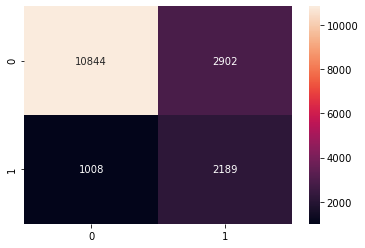

In [178]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')
plt.show()

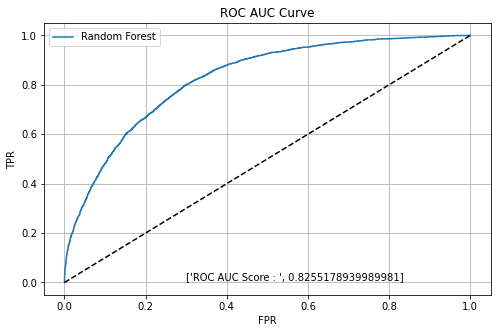

In [179]:
y_pred_prob = rf.predict_proba(X_test)

fpr, tpr, th = roc_curve(y_test, y_pred_prob[:, 1])

plt.figure(figsize = (8,5))
plt.plot(fpr, tpr, label = 'Random Forest')
plt.plot([0,1], [0,1], '--k')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC Curve')
plt.text(0.3, 0.01, s = ['ROC AUC Score : ', roc_auc_score(y_test, y_pred_prob[:, 1])])
plt.legend()
plt.grid()
plt.show()

In [175]:
# We consider the Random Forest Model with 50% Under Sampling + Over Sampling as our final model.

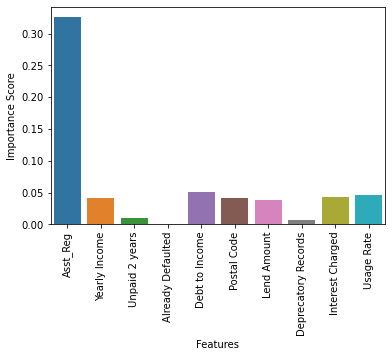

In [180]:
rf_feat = pd.DataFrame()
rf_feat['Features'] = list(X_train.columns)
rf_feat['Importance Score'] = rf.feature_importances_
sns.barplot(rf_feat['Features'].head(10), rf_feat['Importance Score'].head(10))
plt.xticks(rotation = 90)
plt.show()

# Top 10 important features

### Final Model - Random Forest - 50 % Under + Over Sampling

In [211]:
# instantiating over and under sampler


under = RandomUnderSampler(sampling_strategy=0.46) 
over = RandomOverSampler(sampling_strategy=1)

X_under, y_under = under.fit_resample(df_train_final, y)

X_train_c2, y_train_c2 = over.fit_resample(X_under, y_under)

In [212]:
# Random Forest

rf = RandomForestClassifier(criterion = 'gini', n_estimators = 150 , max_depth = 20, min_samples_split = 2)

rf.fit(X_train_c2, y_train_c2)

RandomForestClassifier(max_depth=20, n_estimators=150)

In [218]:
rf_feat = pd.DataFrame()
rf_feat['Features'] = list(X_train.columns)
rf_feat['Importance Score'] = rf.feature_importances_
rf_feat.head(10)

Features  Importance Score
0             Asst_Reg          0.333060
1        Yearly Income          0.039666
2       Unpaid 2 years          0.009601
3    Already Defaulted          0.000692
4       Debt to Income          0.051622
5          Postal Code          0.041994
6          Lend Amount          0.038650
7  Deprecatory Records          0.006998
8     Interest Charged          0.041990
9           Usage Rate          0.046019

In [ ]:
# Above are the top 10 important features from the dataset

In [ ]:
# Asst_Reg : Value of all the assets registered under the borrowers name
# Yearly Income : Total yearly income of the borrower
# Unpaid 2 years : No.of times the Borrower has defaulted in last two years
# Already Defaulted : Number of other loans the borrower was default
# Debt to Income : Debt to Income ratio
# Postal Code : Postal code of borrower
# Lend Amount : Total funded amount to borrower
# Deprecatory Records : An entry that may be considered negative by lenders because it indicates risk and hurts your ability to qualify for credit or other services
# Interest Charged : Interest charged on total amount
# Usage Rate : Processing Charges on the Loan Amount

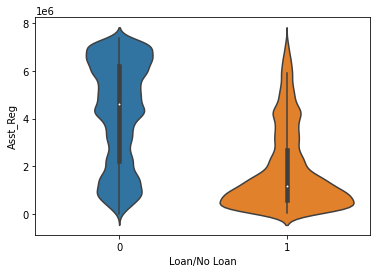

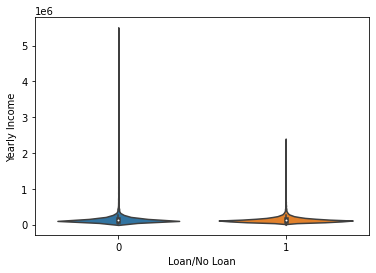

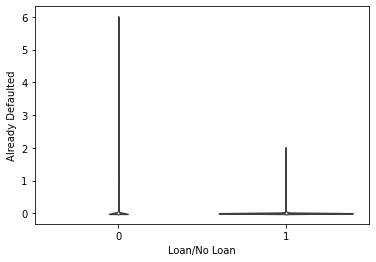

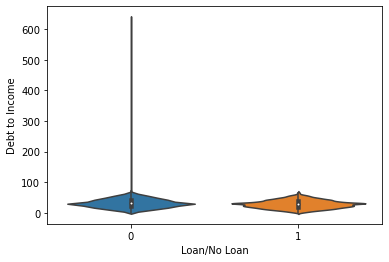

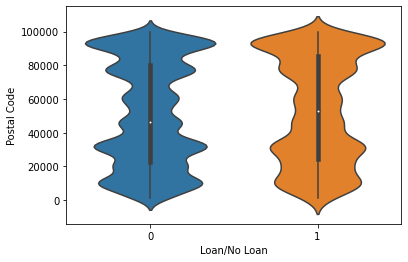

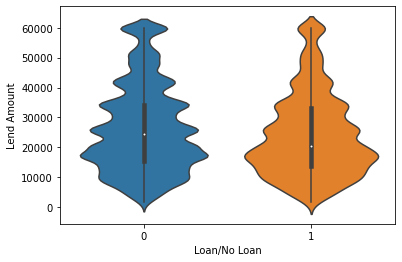

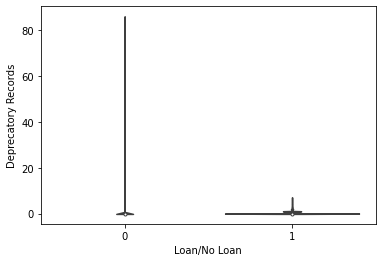

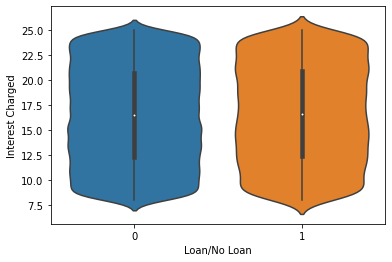

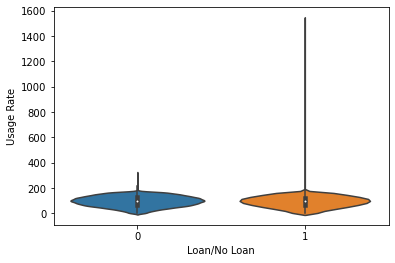

In [230]:
sns.violinplot(df_train['Loan/No Loan'], df_train['Asst_Reg'])
plt.show()

sns.violinplot(df_train['Loan/No Loan'], df_train['Yearly Income'])
plt.show()

sns.violinplot(df_train['Loan/No Loan'], df_train['Already Defaulted'])
plt.show()


sns.violinplot(df_train['Loan/No Loan'], df_train['Debt to Income'])
plt.show()

sns.violinplot(df_train['Loan/No Loan'], df_train['Postal Code'])
plt.show()

sns.violinplot(df_train['Loan/No Loan'], df_train['Lend Amount'])
plt.show()


sns.violinplot(df_train['Loan/No Loan'], df_train['Deprecatory Records'])
plt.show()

sns.violinplot(df_train['Loan/No Loan'], df_train['Interest Charged'])
plt.show()


sns.violinplot(df_train['Loan/No Loan'], df_train['Usage Rate'])
plt.show()

In [ ]:
# From the violin plots above, we can observe for variable - 'Asst_Reg', its distribution is significantly different 
# with respect to the target column classes.
# Similar is the case for columns - 'Already Defaulted', 'Deprecatory Records'